![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M08.T01
#### Created by: Dani Planas Montserrat


In [1]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector

#Import Library Preprocessing and modeling
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [2]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep=',', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [3]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [4]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [5]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [6]:
#************************************************************************************
#********************       LINEAR REGRESSION Functions          ********************
#************************************************************************************
# Function that Split data in train and test:
def split_TrainTest(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    model = sm.OLS(endog=y_train, exog=X_train,)
    model = model.fit()
    print(model.summary())
    return model, X_train, X_test, y_train, y_test 


# Function that Split data in train and test:
def split_TrainTest_KNN(df, Xparam, Yparam):
    # split a dataset into train and test sets
    from scipy.stats import pearsonr
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from sklearn.neighbors import KNeighborsClassifier
    
    #Split the data into Train(70%) and Test(30%)
    X = df[Xparam]
    y = df[Yparam]

    # Split data in Train () & Test
    X_train, X_test, y_train, y_test = train_test_split(
                                            X,
                                            y,
                                            test_size=0.3,
                                            random_state = 1)

    # Create the Model with Train & Test
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Classifier
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    #print(model.summary())
    return classifier, X_train, X_test, y_train, y_test 

In [7]:
#************************************************************************************
#***************************     Correlation Functions     **************************
#************************************************************************************
#Function for convert a correlation matrix in "tidy" format
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [8]:
##########################################################################
##                 DATA SCIENCE: M07.T01: Exercici 1                    ##
##########################################################################
# Exercici 1: Descarrega el dataset adjunt, de registres de publicacions 
# a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant 
# l'algorisme de K-means.


#Import Libraries
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 


path_name = "Data sets\\M08\\"                                        # Define Path name
file_name = "FacebookThailandia.txt"                                  # Define File name
separator = ','                                                       # Define type of char between columns  
movie_column_l = [ 'status_id', 'status_type', 'satatus_published', 'num_reactions', 'num_comments',  
                   'num_shares', 'num_likes', 'num_loves', 'num_wows',
                   'num_hahas', 'num_sads', 'num_angrys','Column1','Column2',
                   'Column3','Column4']                               # Define name of columns

df1 = openFileTable(path_name, file_name, separator, movie_column_l)   # Function to open File


print ("Publicacions de Facebook a Tailandia (2016-2018): ")          # Print Message
display(df1)                                                          # Display datset imported

df = df1.drop(['Column1','Column2','Column3','Column4'],axis=1)        
display(df)                                                           # Display datset imported

print ("Llegenda:")
print ("    EL datset conté el resultat de l'anàlisis químic d'uns vins provinents d'una mateixa") 
print ("    regió d'Itàlia, però cultivat per 3 diferents productors.")
print ("    ")
print ("    0. status_id:                                 identificador foto/video")
print ("    1. status_type:                                           foto o video")
print ("    2. satatus_published:                       data-hora de la publicació")
print ("    3. num_reactions:                  Número de reaccions a la publicació")
print ("    4. num_comments:                                  Número de comentaris")
print ("    5. num_shares:                    Número de vegades que s'ha compartit")
print ("    6. num_likes:                                 Número de icones 'likes'")
print ("    7. num_loves:                                 Número de icones 'loves'")
print ("    8. num_wows:                                   Número de icones 'wows'")
print ("    9. num_hahas:                                 Número de icones 'hahas'")
print ("   10. num_sads:                                   Número de icones 'sads'")
print ("   11. num_angrys:                              Número de icones 'hungrys'")

   

Publicacions de Facebook a Tailandia (2016-2018): 


,status_id,status_type,satatus_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


,status_id,status_type,satatus_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


Llegenda:
    EL datset conté el resultat de l'anàlisis químic d'uns vins provinents d'una mateixa
    regió d'Itàlia, però cultivat per 3 diferents productors.
    
    0. status_id:                                 identificador foto/video
    1. status_type:                                           foto o video
    2. satatus_published:                       data-hora de la publicació
    3. num_reactions:                  Número de reaccions a la publicació
    4. num_comments:                                  Número de comentaris
    5. num_shares:                    Número de vegades que s'ha compartit
    6. num_likes:                                 Número de icones 'likes'
    7. num_loves:                                 Número de icones 'loves'
    8. num_wows:                                   Número de icones 'wows'
    9. num_hahas:                                 Número de icones 'hahas'
   10. num_sads:                                   Número de icones 'sads'
   11. nu

In [9]:
dfNew = df
dfNew['status_type'] = [0 if x == 'video' else 1 for x in df['status_type']]
dfNew = df.drop(['status_id', 'satatus_published'],axis=1)    
display(dfNew)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


<span style=color:green><b>NORMALITZACIÓ DE LES DADES</u></b></span> 


Prèviament hem netejat les dades i hem tret el camp "data i hora" de publicació (satatus_published), el camp "id_status".

A continuació aplicarem una Normalització de les Dades, concretament utilitzarem la funció "MinMaxScaler" que normalitza totes les dades en tre [0 , 1].

      
 


In [10]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_scaled = min_max_scaler.fit_transform(dfNew)
df_scaled = pd.DataFrame(df_scaled)             # Hay que convertir a DF el resultado.
df_scaled = df_scaled.rename(columns = {0: 'status_type', 
                                        1: 'num_reactions', 
                                        2: 'num_comments', 
                                        3: 'num_shares',
                                        4: 'num_likes', 
                                        5: 'num_loves', 
                                        6: 'num_wows',
                                        7: 'num_hahas',  
                                        8: 'num_sads',                                          
                                        9: 'num_angrys'})
display(df_scaled)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,1.0,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,1.0,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,1.0,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,1.0,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,1.0,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,1.0,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,1.0,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


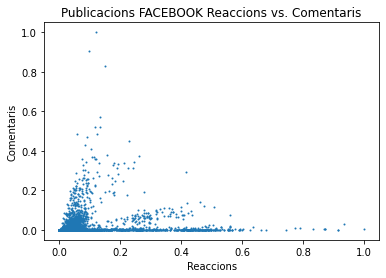

In [11]:
# GRAPHIC: Reactions vs. Comments
x = df_scaled['num_reactions'].values
y = df_scaled['num_comments'].values
plt.xlabel('Reaccions')
plt.ylabel('Comentaris')
plt.title('Publicacions FACEBOOK Reaccions vs. Comentaris')
plt.plot(x,y,'o',markersize=1)

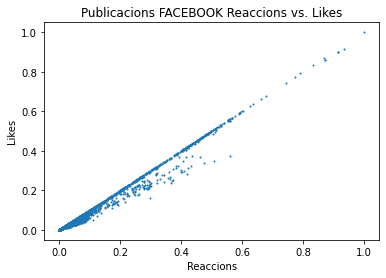

In [12]:
# GRAPHIC: Reactions vs. Likes
x = df_scaled['num_reactions'].values
y = df_scaled['num_likes'].values
plt.xlabel('Reaccions')
plt.ylabel('Likes')
plt.title('Publicacions FACEBOOK Reaccions vs. Likes')
plt.plot(x,y,'o',markersize=1)

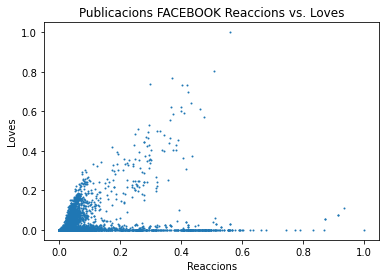

In [13]:
# GRAPHIC: Reactions vs. Likes
x = df_scaled['num_reactions'].values
y = df_scaled['num_loves'].values
plt.xlabel('Reaccions')
plt.ylabel('Loves')
plt.title('Publicacions FACEBOOK Reaccions vs. Loves')
plt.plot(x,y,'o',markersize=1)

In [14]:

df_scaled1 = df_scaled.drop(['num_shares', 'num_comments', 'num_loves', 'num_wows', 'num_hahas','num_sads','num_angrys'  ],axis=1)    
display(df_scaled1)

,status_type,num_reactions,num_likes
0,0.0,0.112314,0.091720
1,1.0,0.031847,0.031847
2,0.0,0.048195,0.043312
3,1.0,0.023567,0.023567
4,1.0,0.045223,0.043312
...,...,...,...
7045,1.0,0.018896,0.018896
7046,1.0,0.003397,0.002972
7047,1.0,0.000425,0.000212
7048,1.0,0.074522,0.074098


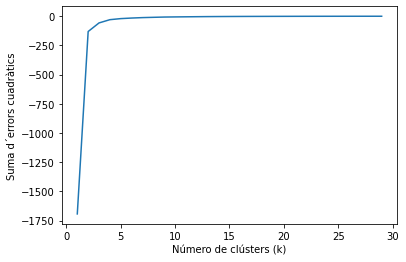

In [15]:
# Create a graphic "elbow" o "Curva del codo" for search the best number for KLUSTERS
nc = range(1, 30)                                     # Number of iterations
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_scaled1).score(df_scaled1) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústers (k)')
plt.ylabel('Suma d´errors cuadràtics')
plt.plot(nc,score)

In [16]:
# Config. Parameters K-means
kmeans = KMeans(
                init="random",
                n_clusters=5,
                n_init=10,
                max_iter=200,
                random_state=42
                )

# Apply k-means with k = 5.
kmeans = kmeans.fit(df_scaled1)
centroids = kmeans.cluster_centers_

print('Obtenim els 5 centres amb K-means, i són els següents:')
print(centroids)

Obtenim els 5 centres amb K-means, i són els següents:
[[ 5.55111512e-15  3.66538015e-02  3.03143671e-02]
 [-5.55111512e-16  3.38253890e-01  3.03229043e-01]
 [ 1.00000000e+00  4.83180145e-01  4.81542100e-01]
 [ 1.00000000e+00  1.72764323e-02  1.68617622e-02]
 [ 1.00000000e+00  2.29942767e-01  2.27801163e-01]]


In [17]:
# Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_scaled1)
df_scaled1['Cluster'] = labels
display(df_scaled1)

,status_type,num_reactions,num_likes,Cluster
0,0.0,0.112314,0.091720,0
1,1.0,0.031847,0.031847,3
2,0.0,0.048195,0.043312,0
3,1.0,0.023567,0.023567,3
4,1.0,0.045223,0.043312,3
...,...,...,...,...
7045,1.0,0.018896,0.018896,3
7046,1.0,0.003397,0.002972,3
7047,1.0,0.000425,0.000212,3
7048,1.0,0.074522,0.074098,3


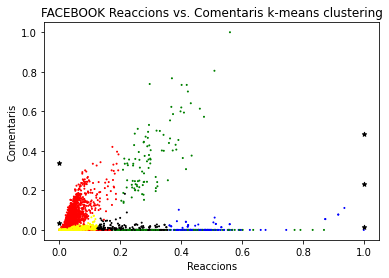

In [18]:
# Plot k-means clustering.
colores=['red','green','blue','yellow','black']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Reaccions')
plt.ylabel('Comentaris')
plt.title('FACEBOOK Reaccions vs. Comentaris k-means clustering')
plt.show()

<span style=color:green><b>CLASSIFICACIÓ de CLÚSTERS</u></b></span> 

De forma simplificada podríem analitzar les dades de la següent forma, amb una breu descripció de cada grup:

    -CLÚSTER BLAU:       Volum ALT de Reaccions i Nivel BAIX de "Likes".
    -CLÚSTER NEGRE:      Volum MITJÀ de Reaccions i Nivel BAIX de "Likes".    
    -CLÚSTER VERD:       Volum MITJÀ de Reaccions i Nivel ALT de "Likes".     
    -CLÚSTER VERMELL:    Volum BAIX de Reaccions i Nivel MITJÀ de "Likes".     
    -CLÚSTERGROC:        Volum BAIX de Reaccions i Nivel BAIX de "Likes".     
      
 


In [19]:
##########################################################################
##                 DATA SCIENCE: M08.T01: Exercici 2                    ##
##########################################################################
# Exercici 2: Classifica els diferents registres utilitzant l'algorisme 
# de clustering jeràrquic.

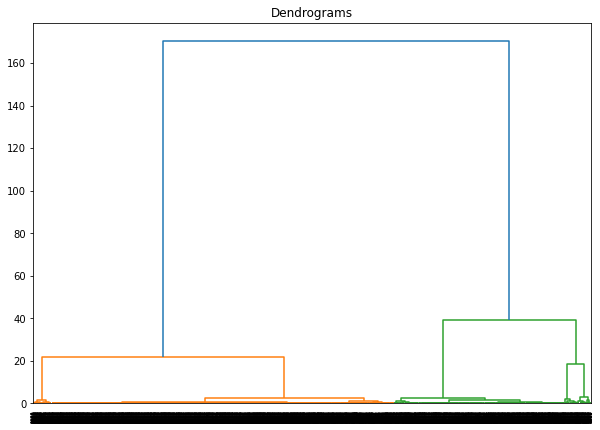

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled1, method='ward'))

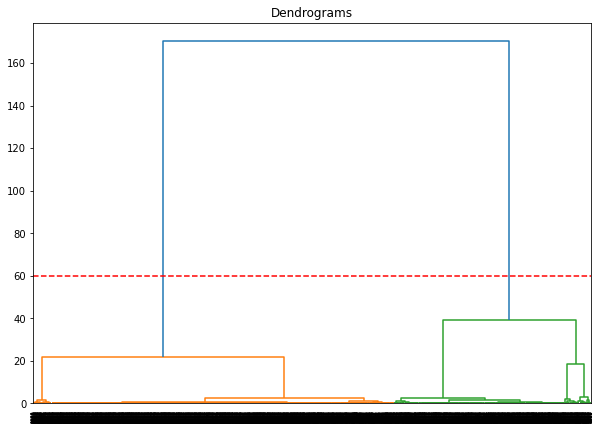

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled1, method='ward'))
plt.axhline(y=60, color='r', linestyle='--')

In [22]:
# Import Library
from sklearn.cluster import AgglomerativeClustering

# Selected only 2 cluster under 60 treshold (see the previous image)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled1)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

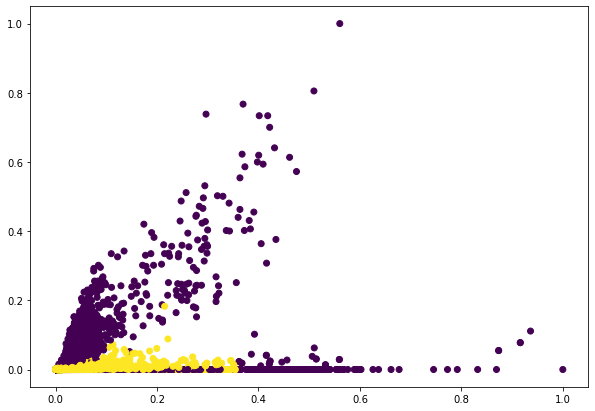

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_scaled['num_reactions'], df_scaled['num_loves'], c=cluster.labels_) 



In [246]:
##########################################################################
##                 DATA SCIENCE: M08.T01: Exercici 3                    ##
##########################################################################
# Exercici 3: Calcula el rendiment del clustering mitjançant un paràmetre 
# com pot ser silhouette.

In [44]:
##########################################################################
##             K-MEANS CLUSTERING: Evaluating with SILHOUETTE           ##
##########################################################################


from sklearn import datasets
from sklearn.cluster import KMeans
#

# Define the X,Y values
X = df_scaled.values
Y = df_scaled['num_reactions'].values

## Config. Parameters K-means
kmeans = KMeans(
                init="random",
                n_clusters=5,
                n_init=10,
                max_iter=200,
                random_state=42
                )

kmeansn = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
kmeans.fit_predict(X)
#
# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
#
# Print the silhouetter Score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.832


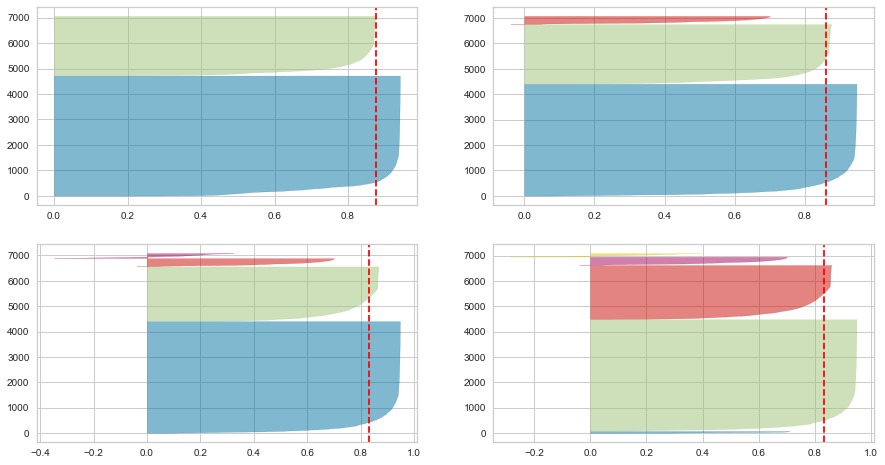

In [42]:
#Import library
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

<span style=color:green><b>ANÀLISIS SILHOUETTER: K-MEAN CLUSTERING</u></b></span> 

El valor de n_clusters 3,4 i 5 sembla ser "SUBÒPTIM" pels següents motius:

   - La Presència de branques per sota de la silueta de la mitja
   - Grans fluctuacions en el tamny de les parceles de la silueta.


Podem observar amb l'anàlsisi de "silhouette" que tenim una puntuació de 0.832 que és molt propera a 1, això ens indica que els clusters están ben separats entre sí.



In [46]:
##########################################################################
##         HIREARCHICAL CLUSTERING: Evaluating with SILHOUETTE          ##
##########################################################################


from sklearn import datasets
from sklearn.cluster import KMeans
#

# Define the X,Y values
X = df_scaled1.values
Y = df_scaled1['num_reactions'].values



# Selected only 2 cluster under 60 treshold (see the previous image)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df_scaled1)


# Calculate Silhoutte Score
score = silhouette_score(X, cluster.labels_, metric='euclidean')
#
# Print the silhouetter Score
print('Silhouetter Score: %.3f' % score)



Silhouetter Score: 0.906


<span style=color:green><b>ANÀLISIS SILHOUETTER: HIREARCHICAL CLUSTERING</u></b></span> 

Podem observar amb l'anàlsisi de "silhouette" que tenim una puntuació de 0.906 que és molt propera a 1, això ens indica que els clusters están ben separats entre sí.
